In [45]:
import pandas as pd 
df = pd.read_csv('Airline_Dataset.csv')

print(df.shape[1])
df.columns = df.columns.str.lower()
print(df.columns)

24
Index(['id', 'gender', 'customer type', 'age', 'type of travel', 'class',
       'flight distance', 'inflight wifi service',
       'departure/arrival time convenient', 'ease of online booking',
       'gate location', 'food and drink', 'online boarding', 'seat comfort',
       'inflight entertainment', 'on-board service', 'leg room service',
       'baggage handling', 'checkin service', 'inflight service',
       'cleanliness', 'departure delay in minutes', 'arrival delay in minutes',
       'satisfaction'],
      dtype='object')


In [46]:
# trouver les valeurs manquantes :
print(df.info())

# les seules valeurs manquantes sont dans le retard à l’arrivée
# pourquoi cette valeur est en float ?

df_retard_manquant = df[df['arrival delay in minutes'].isna()]

print(df_retard_manquant.shape[0])

# pour 393 lignes  sur 130 K , on ne va pas s’ennuyer à mettre une valeur poyenne et simplement les drop

df = df.dropna(axis=0, how='any')
print(129880 - 393)
print(df.shape[0])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   gender                             129880 non-null  object 
 2   customer type                      129880 non-null  object 
 3   age                                129880 non-null  int64  
 4   type of travel                     129880 non-null  object 
 5   class                              129880 non-null  object 
 6   flight distance                    129880 non-null  int64  
 7   inflight wifi service              129880 non-null  int64  
 8   departure/arrival time convenient  129880 non-null  int64  
 9   ease of online booking             129880 non-null  int64  
 10  gate location                      129880 non-null  int64  
 11  food and drink                     1298

In [47]:
# simplifier les colonnes de retard
# on va dire que seul le retard final compte ? Personne ne se rend compte quand un vol part en retard si il arrive à l’heure à destination.

df = df.drop('departure delay in minutes', axis=1)
print(df.shape[1])

23


In [48]:
# chercher des valeurs aberrantes

cols = [
    'gender', 
    'customer type', 
    'age', 
    'type of travel', 
    'class',
    'inflight wifi service',
    'departure/arrival time convenient', 
    'ease of online booking',
    'gate location', 
    'food and drink', 
    'online boarding', 
    'seat comfort',
    'inflight entertainment', 
    'on-board service', 
    'leg room service',
    'baggage handling', 
    'checkin service', 
    'inflight service',
    'cleanliness',
    'satisfaction'
]

for c in cols:
    uniques:list = df[c].unique().tolist()
    uniques.sort()
    print(c, uniques)

gender ['Female', 'Male']
customer type ['Loyal Customer', 'disloyal Customer']
age [7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 85]
type of travel ['Business travel', 'Personal Travel']
class ['Business', 'Eco', 'Eco Plus']
inflight wifi service [0, 1, 2, 3, 4, 5]
departure/arrival time convenient [0, 1, 2, 3, 4, 5]
ease of online booking [0, 1, 2, 3, 4, 5]
gate location [0, 1, 2, 3, 4, 5]
food and drink [0, 1, 2, 3, 4, 5]
online boarding [0, 1, 2, 3, 4, 5]
seat comfort [0, 1, 2, 3, 4, 5]
inflight entertainment [0, 1, 2, 3, 4, 5]
on-board service [0, 1, 2, 3, 4, 5]
leg room service [0, 1, 2, 3, 4, 5]
baggage handling [1, 2, 3, 4, 5]
checkin service [0, 1, 2, 3, 4, 5]
inflight service [0, 1, 2, 3, 4, 5]
cleanliness [0, 1, 2, 3, 4, 5]
satisfa

In [49]:
# remplacer les 0 par la moyenne de cette categorie par ce que 0 ca veut dire «ne se prononce pas»
cols = [
    'inflight wifi service',
    'departure/arrival time convenient', 
    'ease of online booking',
    'gate location', 
    'food and drink', 
    'online boarding', 
    'seat comfort',
    'inflight entertainment', 
    'on-board service', 
    'leg room service',
    'baggage handling', 
    'checkin service', 
    'inflight service',
    'cleanliness'
]

for c in cols:
    mean = df[c].loc[df[c] != 0 ].mean()
    print(round(mean, 1))
    df[c].replace({0: round(mean, 1)}, inplace=True)

2.8
3.2
2.9
3.0
3.2
3.3
3.4
3.4
3.4
3.4
3.6
3.3
3.6
3.3


In [50]:
# reste 'Flight Distance' et 'Arrival Delay in Minutes'
# on va juste regarder les valeurs hautes et basse par rapport à la moyenne
print('distance moyenne : ', df['flight distance'].mean())
distances:list = df['flight distance'].unique().tolist()
distances.sort()
dist_mins = distances[:5]
dist_maxs = distances[-5:]
print('distances min : ', dist_mins)
print('distances min : ', dist_maxs)

dfmin = df[['id', 'flight distance']]
dfmin = dfmin.groupby(by=['flight distance']).count()
dfmin

# on constate que ces valeurs extrêmes sont tout de même communes à de nombreuses personnes et sont donc probablement cohérentes.

distance moyenne :  1190.2106620741852
distances min :  [31, 56, 67, 73, 74]
distances min :  [4243, 4502, 4817, 4963, 4983]


,id
flight distance,
31,11
56,11
67,160
73,77
74,42
...,...
4243,23
4502,14
4817,6


In [51]:
# pour le retard:
print('moyenne des retards : ', df['arrival delay in minutes'].mean())
dfret = df[['id', 'arrival delay in minutes', 'satisfaction']]
dfret = dfret.groupby(by=['arrival delay in minutes']).count()
# dfret.sort_values('Arrival Delay in Minutes', inplace=True)
dfret.tail(20)

# il existe de hautes valeurs pour le retard mais elles ne concernent que des cas isolés
# (comment est-ce possible ? Le vol n’avait qu’un seul passager ?)
# notons au passage que certaines personnes semblent ne pas être trop génées par des retards extrêmes.

moyenne des retards :  15.09112883918849


,id,satisfaction
arrival delay in minutes,,
691.0,1,1
702.0,1,1
705.0,1,1
717.0,1,1
720.0,1,1
729.0,1,1
748.0,1,1
795.0,1,1
822.0,1,1


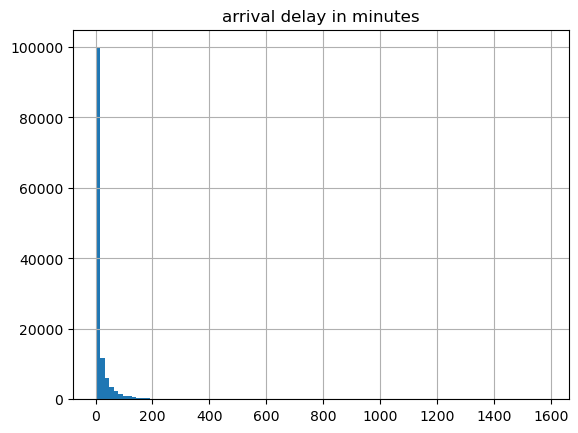

In [52]:
from matplotlib import pyplot as plt

# distribution des retards : 
plt.hist(df['arrival delay in minutes'],bins=100)
plt.grid()
plt.title('arrival delay in minutes')
plt.show()

In [53]:
# desormais on peut préparer le dataframe pour le modèle de machine learning
# séparer les colonnes de catégories en valeurs boléennes 0/1

df_prep = df.copy()

def prep_dummies(df:pd.DataFrame, col):
    categories = df[col].unique().tolist()
    df = pd.get_dummies(df, columns=[col])
    cat_map = {f'{col}_{cat}': cat.lower() for cat in categories}
    df.rename(columns=cat_map, inplace=True)

    return df

categories_cols = ['gender', 'customer type', 'class', 'type of travel']

for col in categories_cols : 
    df_prep = prep_dummies(df_prep, col)
print(df_prep.columns)
print(df_prep.shape[1])


Index(['id', 'age', 'flight distance', 'inflight wifi service',
       'departure/arrival time convenient', 'ease of online booking',
       'gate location', 'food and drink', 'online boarding', 'seat comfort',
       'inflight entertainment', 'on-board service', 'leg room service',
       'baggage handling', 'checkin service', 'inflight service',
       'cleanliness', 'arrival delay in minutes', 'satisfaction', 'female',
       'male', 'loyal customer', 'disloyal customer', 'business', 'eco',
       'eco plus', 'business travel', 'personal travel'],
      dtype='object')
28


In [54]:
# remplacer les valeurs dans la colonne satisfaction par 0 et 1
df_prep['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1}, inplace=True)
# passage des retards en int
df_prep['arrival delay in minutes'] = df_prep['arrival delay in minutes'].astype(int)
# drop de l’id au passage
df_prep = df_prep.drop(['id'], axis=1)

# export des données
df_prep.to_csv('clean_aiplane.csv', index=False)
